In [0]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [0]:
url = 'https://raw.githubusercontent.com/sharifovrus/VIX---CBOE-Volatility-Index/master/vix-daily_csv.csv'
data = pd.read_csv(url)

In [3]:
data.head()

,Date,VIX Open,VIX High,VIX Low,VIX Close
0,2004-01-02,17.96,18.68,17.54,18.22
1,2004-01-05,18.45,18.49,17.44,17.49
2,2004-01-06,17.66,17.67,16.19,16.73
3,2004-01-07,16.72,16.75,15.50,15.50
4,2004-01-08,15.42,15.68,15.32,15.61


In [4]:
data.isnull().sum()

Date         0
VIX Open     0
VIX High     0
VIX Low      0
VIX Close    0
dtype: int64

In [5]:
data.tail()

,Date,VIX Open,VIX High,VIX Low,VIX Close
4032,2020-01-09,12.95,13.24,12.53,12.54
4033,2020-01-10,12.42,12.87,12.09,12.56
4034,2020-01-13,12.84,13.09,12.32,12.32
4035,2020-01-14,12.72,13.82,12.05,12.39
4036,2020-01-15,12.79,12.83,11.95,12.42


In [6]:
data = data.drop(['Date', 'VIX Open', 'VIX High', 'VIX Low'], axis=1)
data

,VIX Close
0,18.22
1,17.49
2,16.73
3,15.50
4,15.61
...,...
4032,12.54
4033,12.56
4034,12.32
4035,12.39


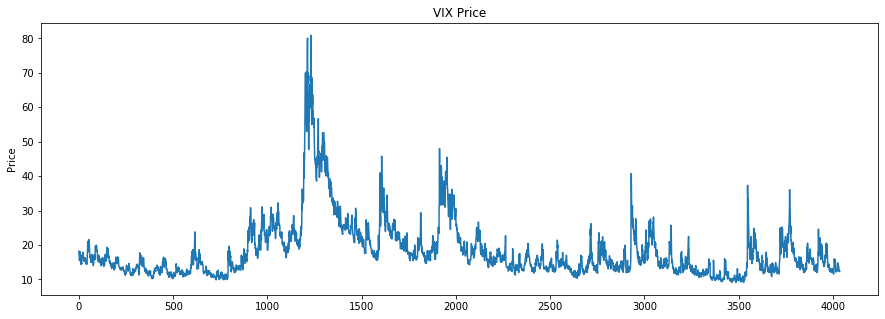

In [7]:
plt.figure(figsize=(15,5))
plt.plot(data.index, data)
plt.title('VIX Price')
plt.ylabel('Price');
plt.show()


In [0]:
# normalize features - 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [9]:
# split into train and test sets
data = data.astype('float32')
train_size = int(len(data) * 0.7)
test_size = len(data) - train_size
train = data[0:train_size,:]
test = data[train_size:len(data),:]
print(len(train), len(test))

2825 1212


In [0]:
def new_data(data, step_size=1):
    X, Y = [], []
    for i in range(len(data)-step_size-1):
        X.append(data[i:(i+step_size),0])
        Y.append(data[i + step_size,0])
    return np.array(X), np.array(Y)

In [0]:
step_size = 10
X_train, Y_train = new_data(train, step_size)
X_test, Y_test = new_data(test, step_size)

In [0]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [14]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(8, input_shape=(1, step_size)))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 8)                 608       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 617
Trainable params: 617
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X_train, Y_train, epochs=120, batch_size=64, verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/120





 - 1s - loss: 0.0122
Epoch 2/120
 - 0s - loss: 0.0079
Epoch 3/120
 - 0s - loss: 0.0059
Epoch 4/120
 - 0s - loss: 0.0051
Epoch 5/120
 - 0s - loss: 0.0043
Epoch 6/120
 - 0s - loss: 0.0040
Epoch 7/120
 - 0s - loss: 0.0037
Epoch 8/120
 - 0s - loss: 0.0037
Epoch 9/120
 - 0s - loss: 0.0037
Epoch 10/120
 - 0s - loss: 0.0041
Epoch 11/120
 - 0s - loss: 0.0033
Epoch 12/120
 - 0s - loss: 0.0036
Epoch 13/120
 - 0s - loss: 0.0032
Epoch 14/120
 - 0s - loss: 0.0032
Epoch 15/120
 - 0s - loss: 0.0030
Epoch 16/120
 - 0s - loss: 0.0027
Epoch 17/120
 - 0s - loss: 0.0033
Epoch 18/120
 - 0s - loss: 0.0030
Epoch 19/120
 - 0s - loss: 0.0028
Epoch 20/120
 - 0s - loss: 0.0028
Epoch 21/120
 - 0s - loss: 0.0029
Epoch 22/120
 - 0s - loss: 0.0031
Epoch 23/120
 - 0s - loss: 0.0027
Epoch 24/120
 - 0s - loss: 0.0029
Epoch 25/120
 - 0s - loss: 0.0026
Epoch 26/120
 - 0s - loss: 0.0031
Epoch 27/120
 - 0s - lo

<function matplotlib.pyplot.show>

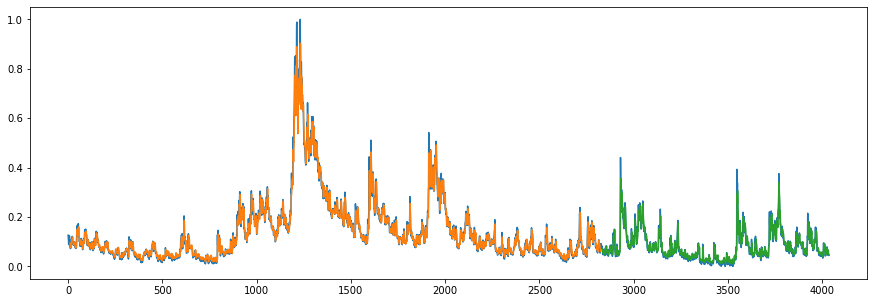

In [18]:
trainPredict = model.predict(X_train)
testPredict=model.predict(X_test)

trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[step_size:len(trainPredict)+step_size, :]=trainPredict

testPredictPlot = np.empty_like(data)
testPredictPlot[:, :]=np.nan
testPredictPlot[len(trainPredict)+(step_size*2)+1 : len(data)-1, :]=testPredict

plt.figure(figsize=(15,5))
plt.plot(data)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show